## Data Handling & Preprocessing

In [30]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import sys
import os
from shapely.geometry import box
import geopandas as gpd
sys.path.append(os.path.abspath("../scripts"))
# import data_preprocessing

In [33]:
data_files = pd.read_csv("../data/eaglei_data/eaglei_outages_2014.csv")
data_files

,fips_code,county,state,customers_out,run_start_time
0,1037,Coosa,Alabama,12,2014-11-01 04:00:00
1,1051,Elmore,Alabama,7,2014-11-01 04:00:00
2,1109,Pike,Alabama,1,2014-11-01 04:00:00
3,1121,Talladega,Alabama,31,2014-11-01 04:00:00
4,4017,Navajo,Arizona,1,2014-11-01 04:00:00
...,...,...,...,...,...
1689455,55029,Door,Wisconsin,1,2014-12-31 00:00:00
1689456,55079,Milwaukee,Wisconsin,1,2014-12-31 00:00:00
1689457,55093,Pierce,Wisconsin,6,2014-12-31 00:00:00
1689458,55125,Vilas,Wisconsin,6,2014-12-31 00:00:00


In [45]:
def analyze_and_visualize(file):
    df = pd.read_csv(file, parse_dates=["run_start_time"])
    df = df.sort_values(["fips_code", "run_start_time"])  # Sortowanie danych
    
    # 1. Mapa braków danych (liczba zapisanych wartości na hrabstwo)
    fips_counts = df["fips_code"].value_counts()
    missing_fips = all_fips - set(df["fips_code"])  # Hrabstwa, które nie mają danych
    
    plt.figure(figsize=(10, 5))
    sns.histplot(fips_counts, bins=50, kde=True)
    plt.xlabel("Liczba zapisów na hrabstwo")
    plt.ylabel("Liczba hrabstw")
    plt.title("Rozkład liczby zapisów w hrabstwach")
    plt.show()
    
    print(f"Liczba hrabstw bez danych: {len(missing_fips)}")
    
    # 2. Histogram długości przerw w dostawie prądu
    df["Outage_Duration"] = df.groupby("fips_code")["run_start_time"].diff().dt.total_seconds() / 60
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Outage_Duration"].dropna(), bins=50, kde=True)
    plt.xlabel("Czas między zapisami (minuty)")
    plt.ylabel("Liczba wystąpień")
    plt.title("Rozkład przerw w dostawie prądu")
    plt.xlim(0, 500)
    plt.show()
    
    # 3. Wykres czasowy liczby klientów bez prądu
    df_time = df.groupby("run_start_time")["customers_out"].sum()
    plt.figure(figsize=(12, 5))
    df_time.plot()
    plt.xlabel("Czas")
    plt.ylabel("Liczba klientów bez prądu")
    plt.title("Liczba klientów bez prądu w czasie")
    plt.show()


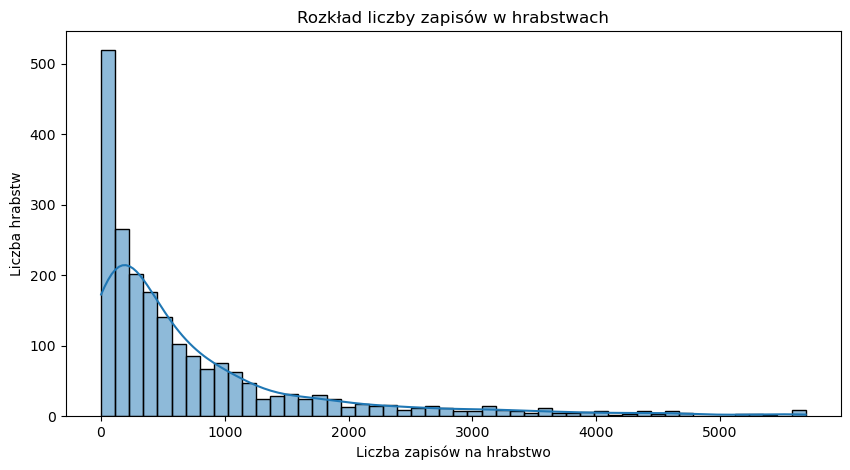

Liczba hrabstw bez danych: 3234


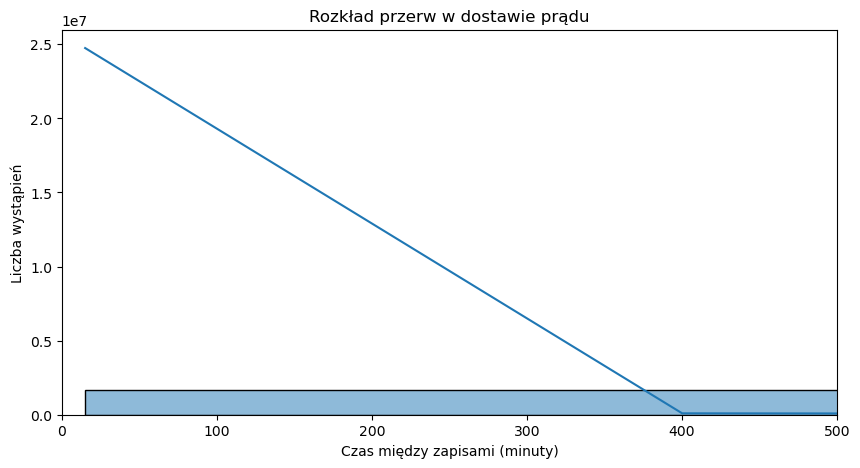

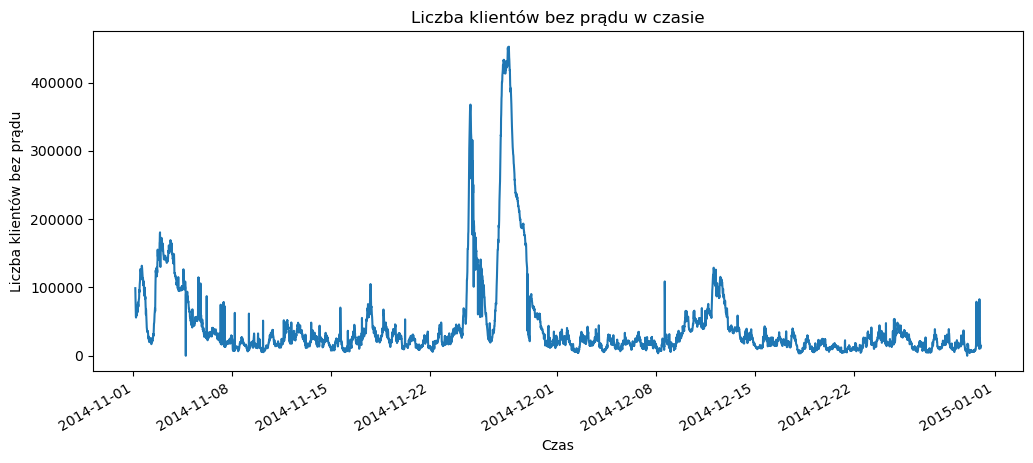

In [47]:
data_files = glob.glob("../data/eaglei_data/eaglei_outages_*.csv")
mcc = pd.read_csv("../data/eaglei_data/MCC.csv")
all_fips = set(mcc["County_FIPS"]) 

analyze_and_visualize(data_files[0])


## Modeled county customers
* County_FIPS - If a FIPS code is missing from this list, we are missing information in EAGLE-I for utilities that have customers in this county.
* Customers: The modelled result for the number of electric utility customers living in this county


In [ ]:
# Load the dataset
df_MCC = pd.read_csv('../data/eaglei_data/MCC.csv')
df_MCC

There are 3244 counties and county equivalents in.

# Eaglei_outages_

## Missing counties

In [ ]:
def countyCountBarPlots(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_data = pd.DataFrame()

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        print(file_name)
        if not os.path.exists(file_path):
            print(f"Plik {file_name} nie istnieje!")
            continue

        df_power = pd.read_csv(file_path)

        unique_fips = (
            df_power.groupby('state')['fips_code']
            .nunique()
            .reset_index()
            .sort_values(by='fips_code')
        )

        plt.figure(figsize=(10, 8))
        plt.barh(unique_fips['state'], unique_fips['fips_code'], color='skyblue')
        plt.xlabel('Nr of counties')
        plt.ylabel('State')
        plt.title(f'Nr of counties per state with power_outages data in {year}')
        plt.tight_layout()
        plt.show()
        unique_fips = unique_fips.rename(columns={'fips_code': year})
        print(unique_fips.columns)


        if combined_data.empty:
            combined_data = unique_fips
        else:
            combined_data = pd.merge(combined_data, unique_fips, on='state', how='outer')

 
    states = combined_data['state']


    y_indexes = np.arange(len(states)) 
    height = 0.9 / len(years) 

    plt.figure(figsize=(15, 3*len(years)))

    for i, year in enumerate(years):
        plt.barh(y_indexes + i * height, combined_data[year], height=height, label=str(year))

    plt.ylabel("State", fontsize=12)
    plt.xlabel("Nr of counties", fontsize=12)
    plt.title(f"Nr of counties per state with power_outages data in consecutive years: ({year_start}, {year_end})", fontsize=16)
    plt.yticks(y_indexes + (len(years) - 1) * height / 2, states)
    plt.legend(title="Year", fontsize=10)

    plt.tight_layout()
    plt.show()
    

    


eaglei_outages_2014.csv


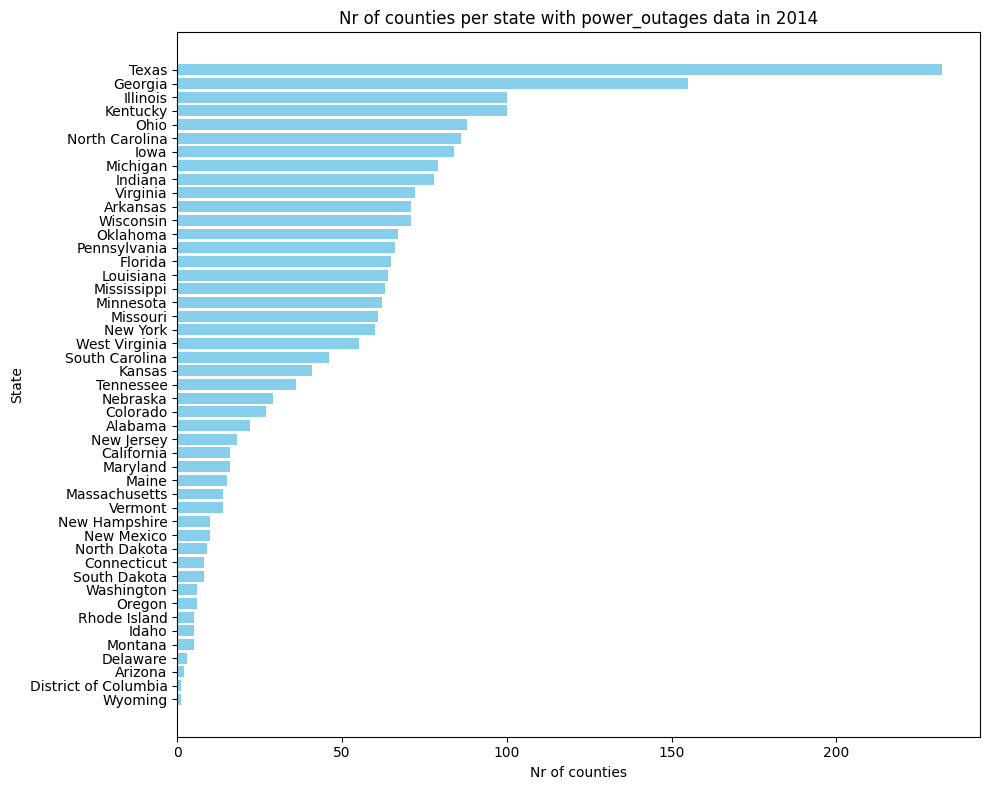

Index(['state', 2014], dtype='object')
eaglei_outages_2015.csv


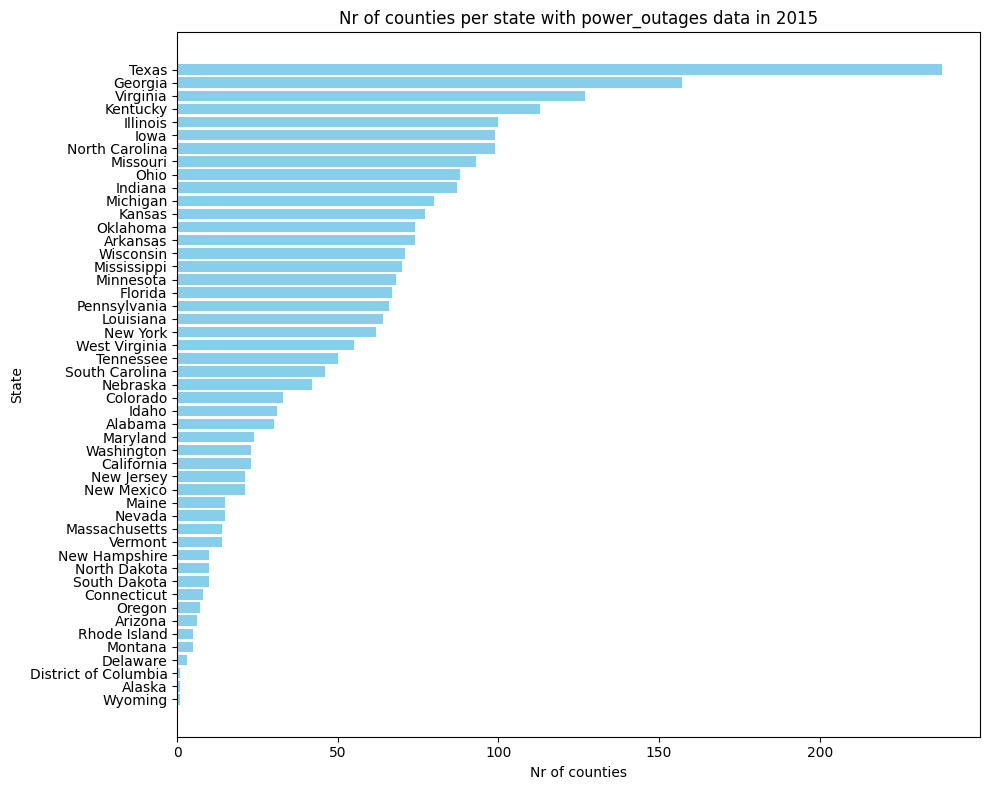

Index(['state', 2015], dtype='object')
eaglei_outages_2016.csv


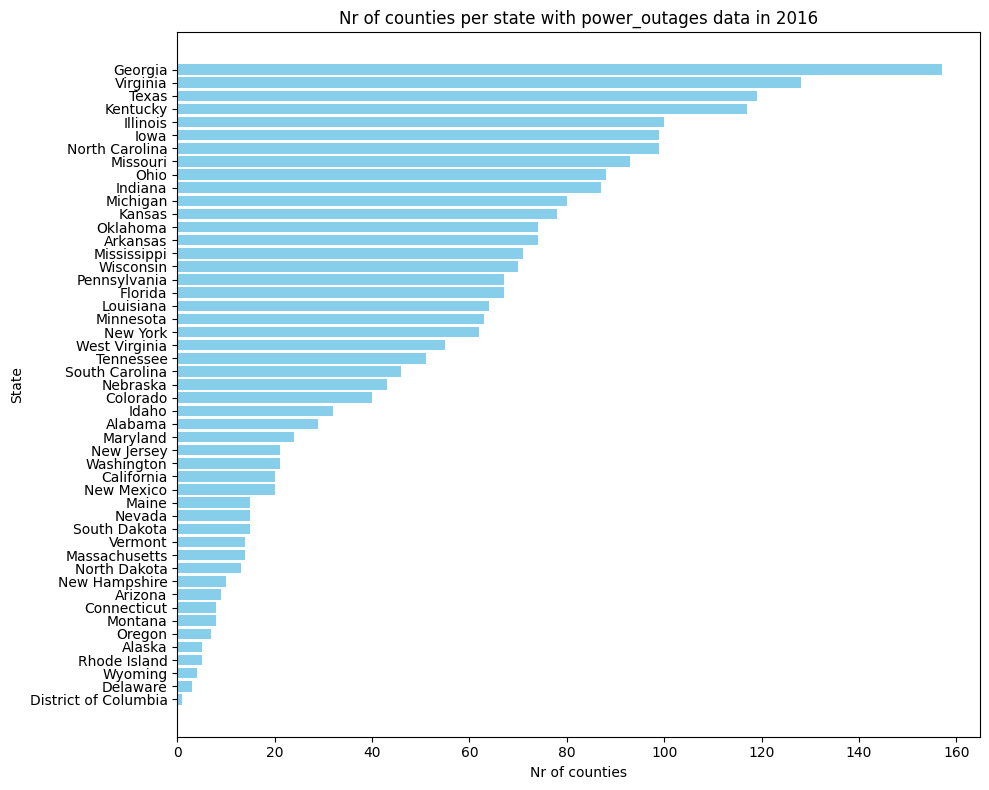

Index(['state', 2016], dtype='object')
eaglei_outages_2017.csv


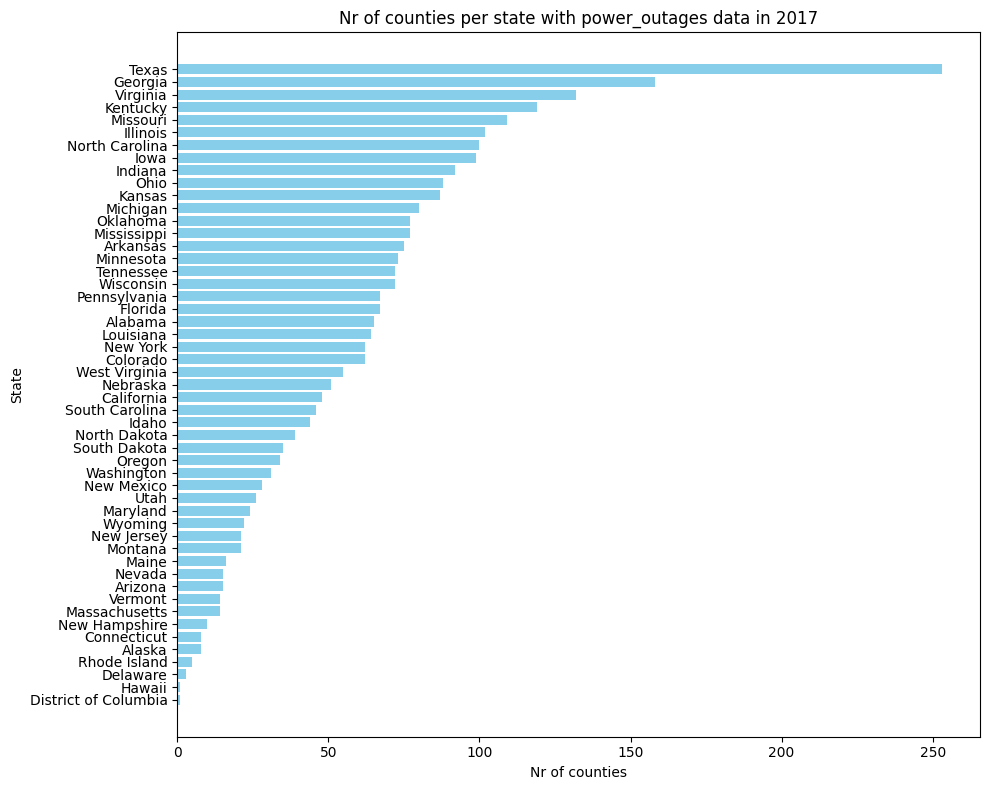

Index(['state', 2017], dtype='object')
eaglei_outages_2018.csv


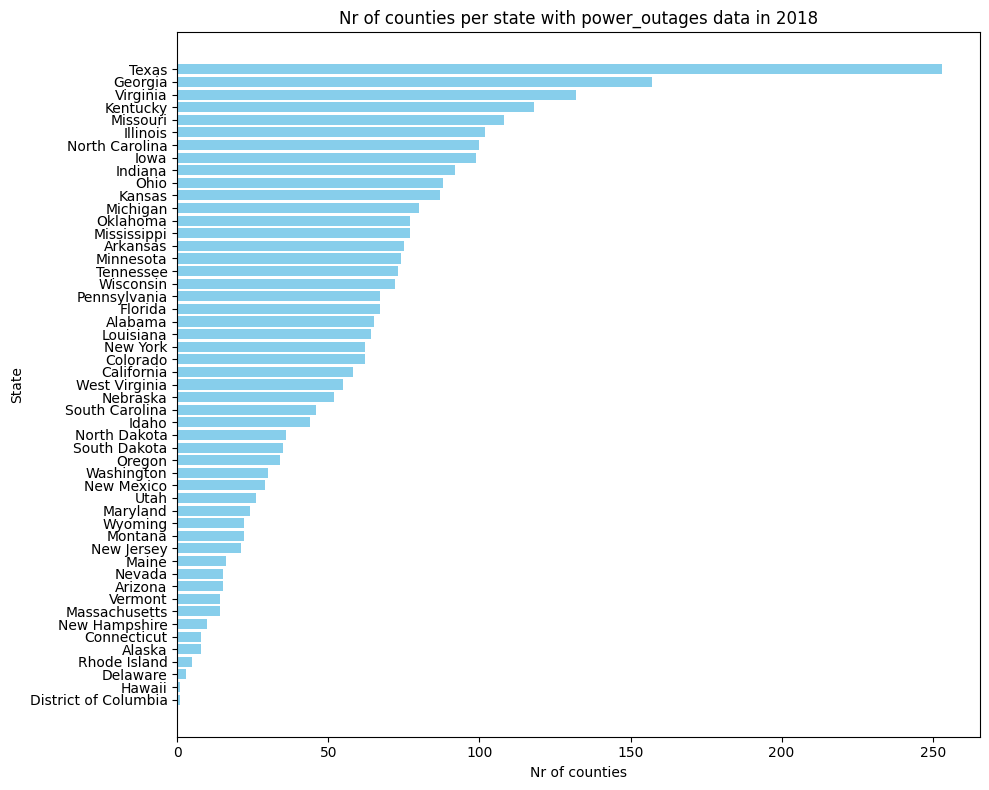

Index(['state', 2018], dtype='object')
eaglei_outages_2019.csv


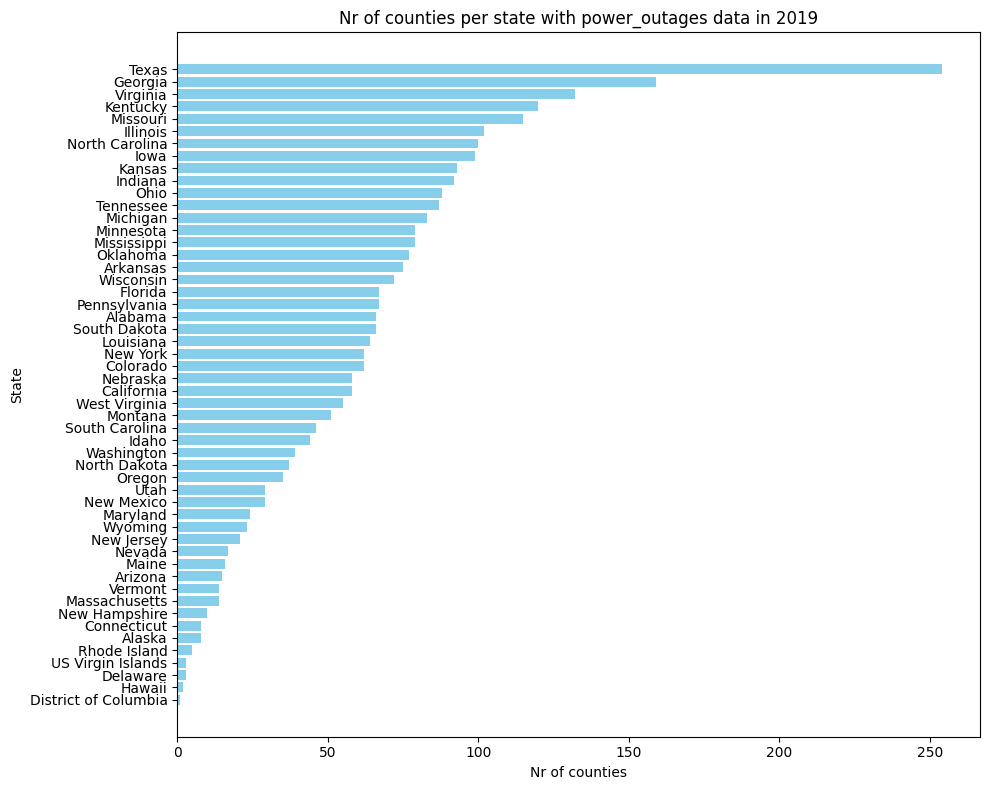

Index(['state', 2019], dtype='object')
eaglei_outages_2020.csv


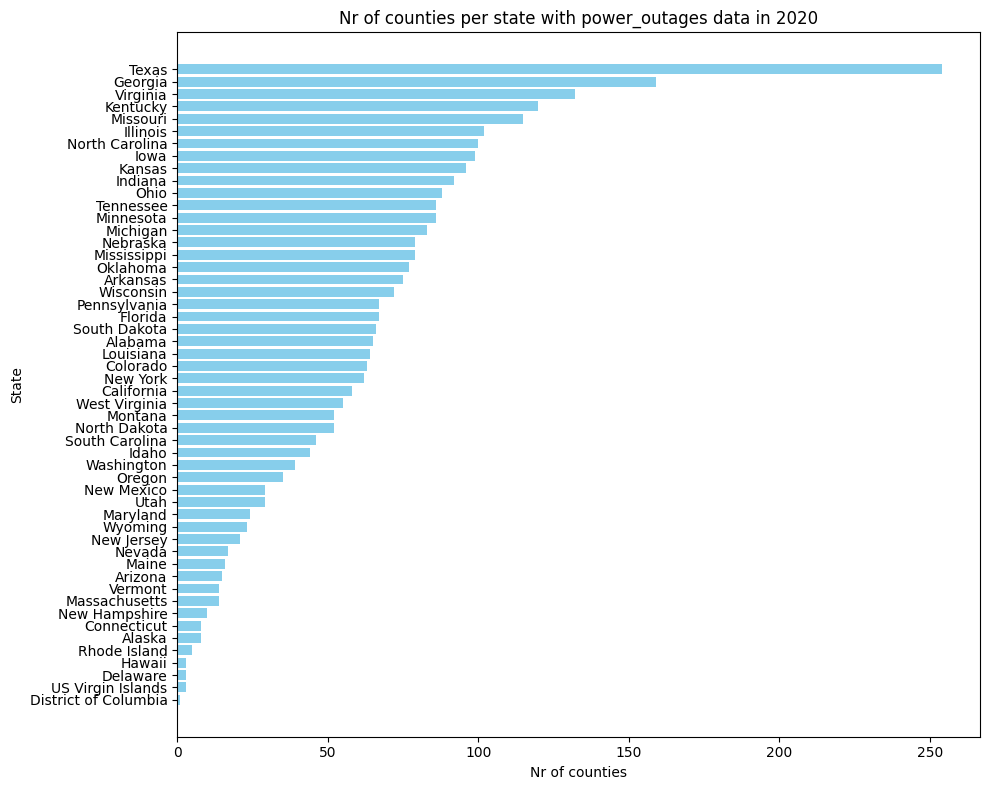

Index(['state', 2020], dtype='object')
eaglei_outages_2021.csv


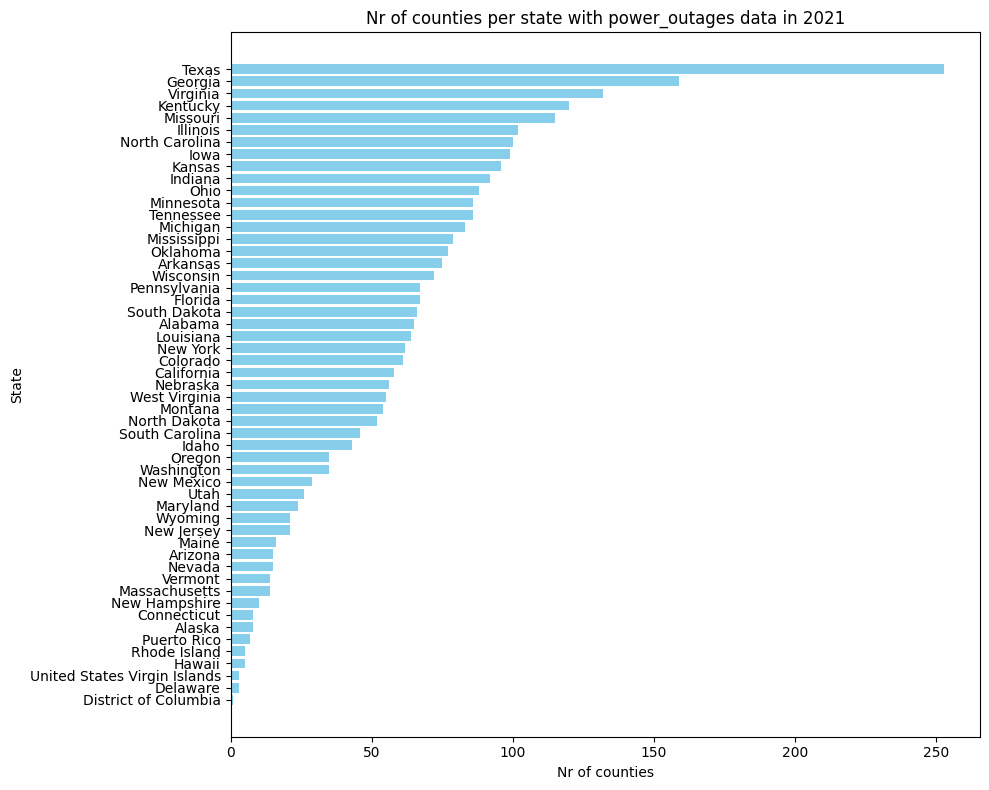

Index(['state', 2021], dtype='object')
eaglei_outages_2022.csv


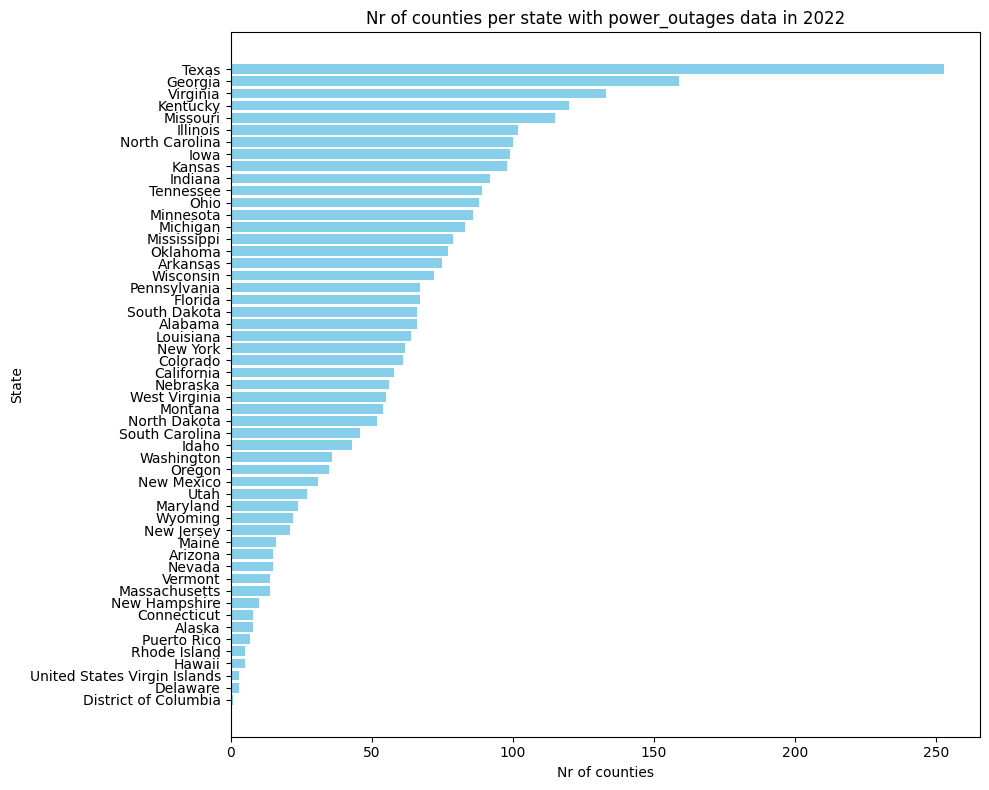

Index(['state', 2022], dtype='object')
eaglei_outages_2023.csv


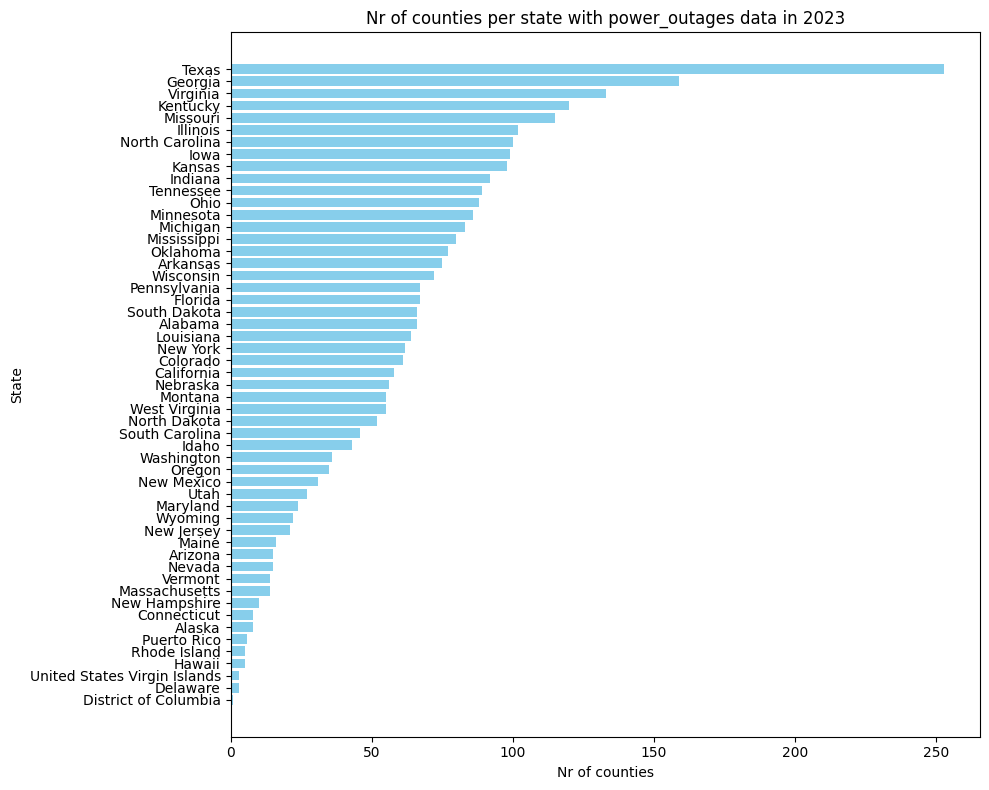

Index(['state', 2023], dtype='object')


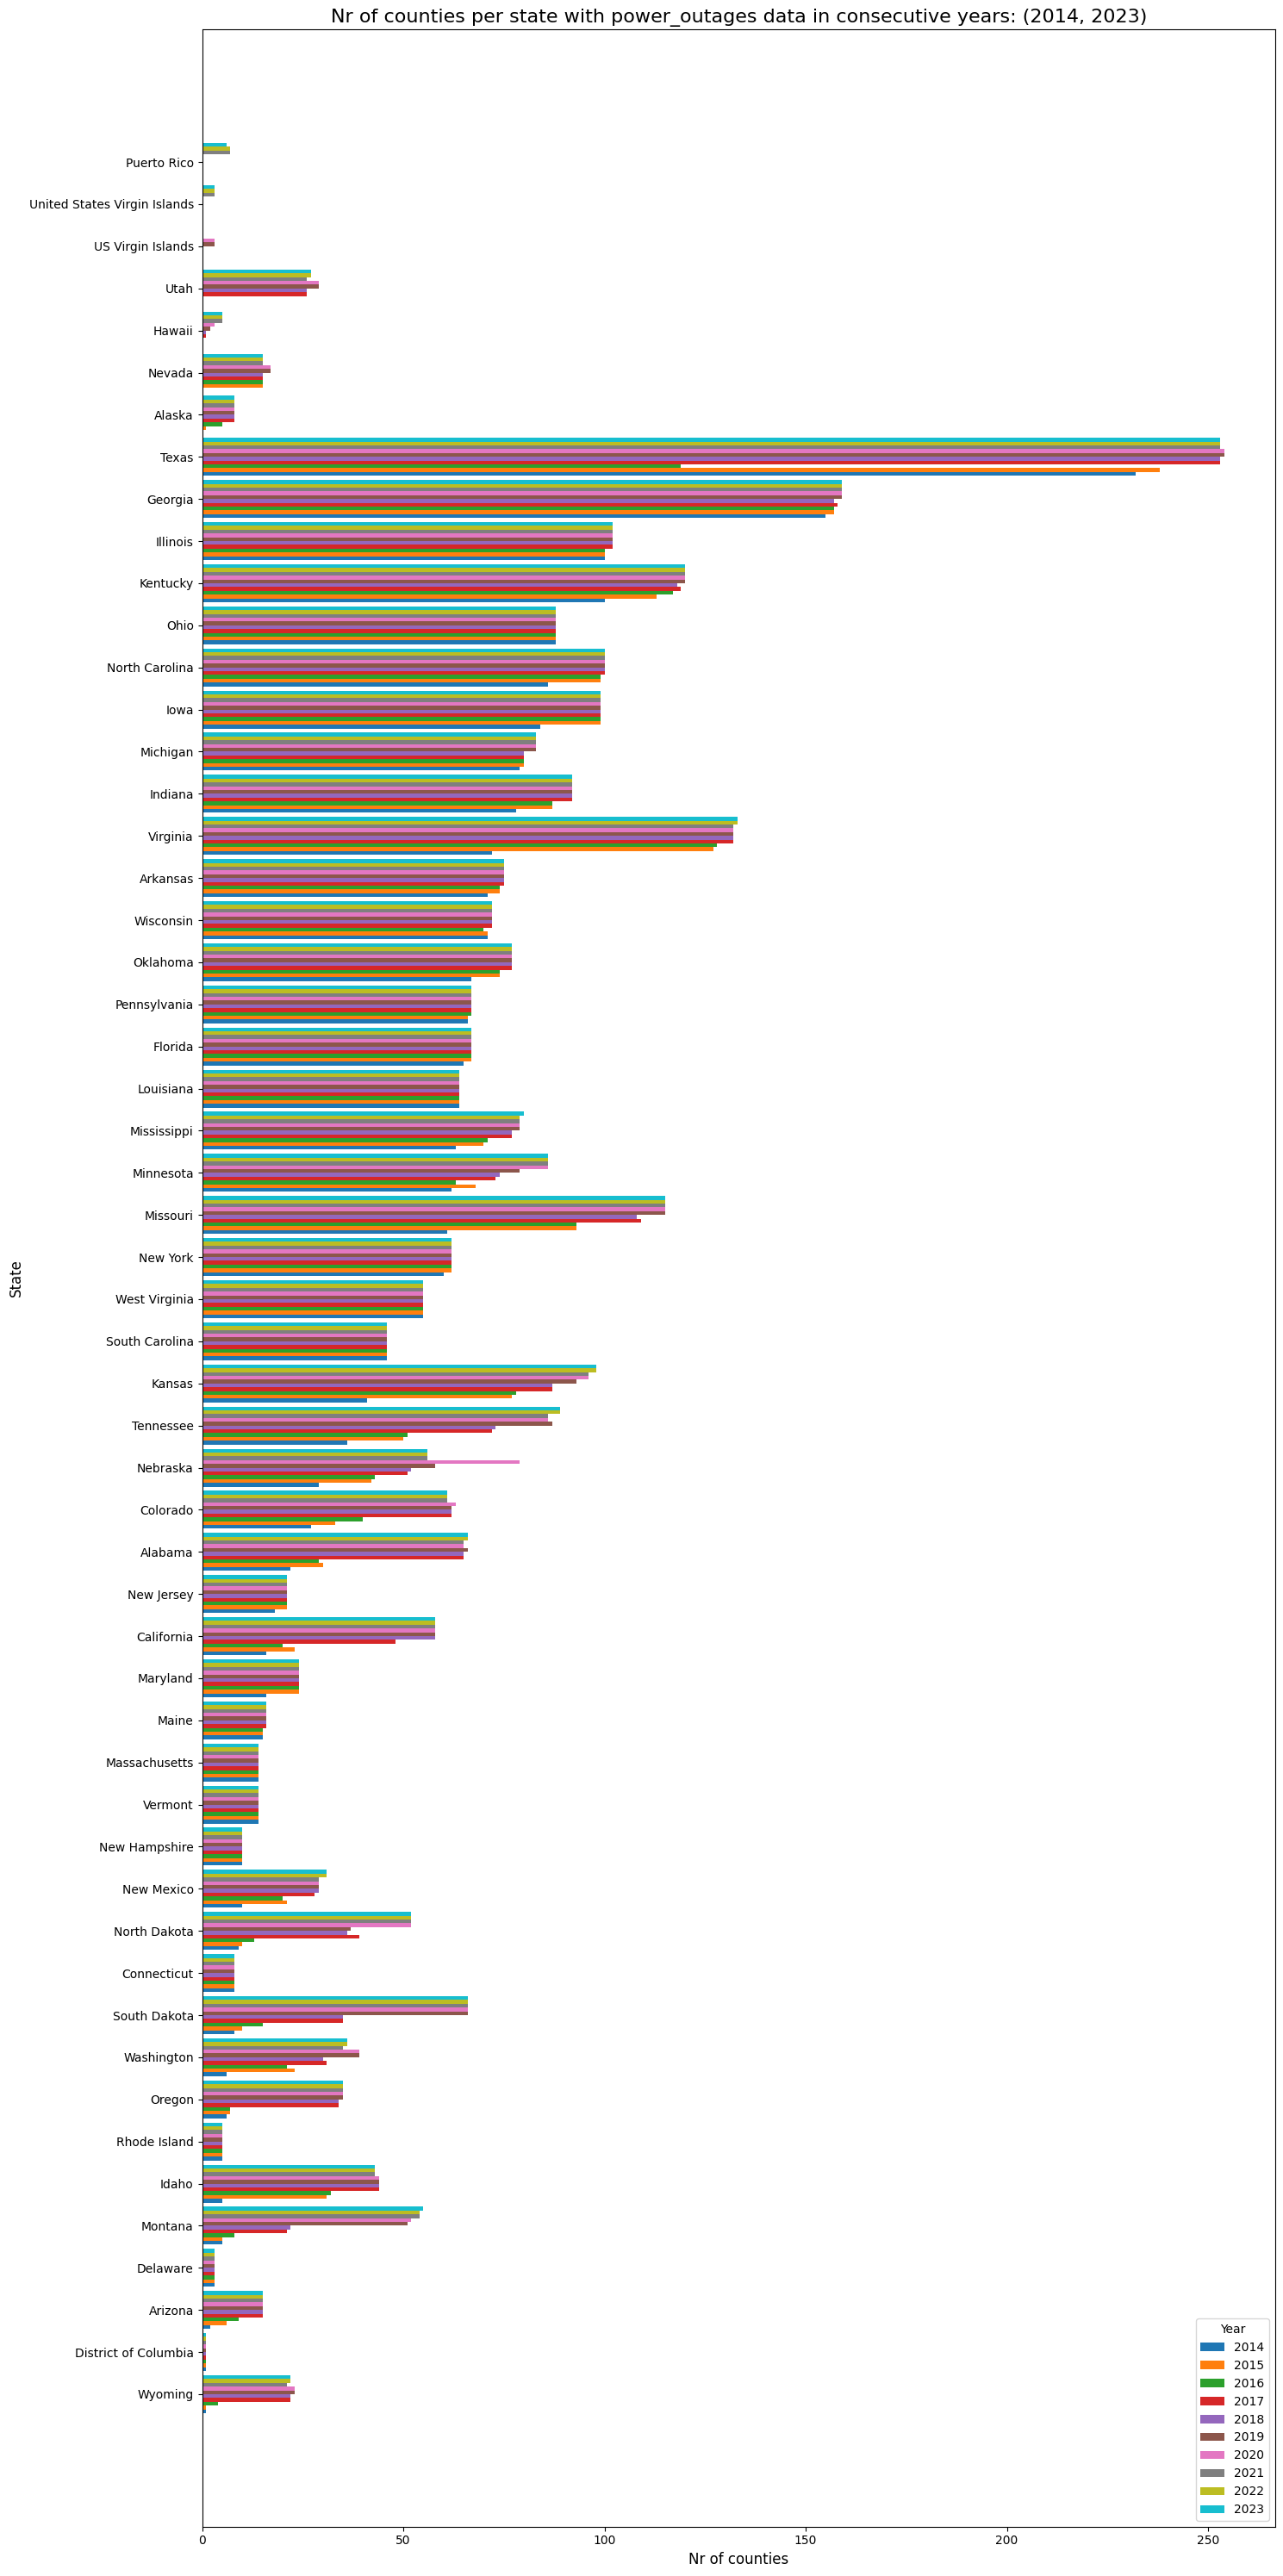

In [118]:
countyCountBarPlots(2014,2023)

In [ ]:
def missingCountyMap(df):
    url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
    usa_states = gpd.read_file(url)
    shapefile_path = "../data/US_county/tl_2024_us_county.shp"
    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)

    # df['fips_code'] = df['fips_code'].astype(str).str.zfill(5)

    df.loc[:, 'fips_code']  = df['fips_code'].astype(str).str.zfill(5)

    fips_codes = df.iloc[:,0].to_numpy().reshape(-1,1)
    fips_codes = pd.DataFrame(np.unique(fips_codes))
    fips_codes= fips_codes.astype(str)
    fips_codes = fips_codes.rename(columns={0 : "FIPS"})
    fips_codes['Data'] = df['normalized_non_nan']
    merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
    # merged['Data'] = merged['FIPS'].apply(lambda x: 0 if pd.isna(x) else 1)

    us_bounds = box(-125, 24, -66, 50)

    mainland_us = merged[merged.geometry.intersects(us_bounds)]

    nan_counties = mainland_us[mainland_us['FIPS'].isna()]
    non_nan_counties = mainland_us[mainland_us['FIPS'].notna()]

    mainland_states = usa_states[usa_states.geometry.intersects(us_bounds)]


    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    nan_counties.plot(ax=ax, color="black", edgecolor="black", label="Brak FIPS")

    non_nan_counties.plot(column='Data', ax=ax, cmap="Reds", legend=True, 
                        edgecolor="grey", missing_kwds={"color": "lightgrey"})
    
    mainland_states.boundary.plot(ax=ax, color='red', linewidth=1, label="Granice stanów")


    ax.set_title("Główne terytorium USA z wyróżnionymi hrabstwami bez FIPS", fontsize=16)
    # ax.legend(["Brak FIPS"], fontsize=12)

    plt.show()



def countyCount(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_count = pd.DataFrame()

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        print(file_name)
        if not os.path.exists(file_path):
            print(f"Plik {file_name} nie istnieje!")
            continue

        df_power = pd.read_csv(file_path)

        unique_fips_2 =(
            df_power[['fips_code', 'state']]
            .drop_duplicates().sort_values(by='fips_code').reset_index()
            .drop(columns=['state', 'index'])
        )

        unique_fips_2['col'] = unique_fips_2['fips_code']
        unique_fips_2 = unique_fips_2.rename(columns={'col': year})
        print(unique_fips_2.columns)

        if combined_count.empty:
            combined_count = unique_fips_2
        else:
            print(combined_count.columns)
            combined_count = pd.merge(combined_count, unique_fips_2, on='fips_code', how='outer')



    combined_count['non_nan_count'] = combined_count.drop(columns=['fips_code']).notna().sum(axis=1)
    num_columns_to_count = combined_count.drop(columns=['fips_code', 'non_nan_count']).shape[1]

    # Dodanie nowej kolumny z wynikiem dzielenia
    combined_count['normalized_non_nan'] = combined_count['non_nan_count'] / num_columns_to_count
    print(combined_count)
    df = combined_count[['fips_code','normalized_non_nan']]
    missingCountyMap(df)
    

    


eaglei_outages_2014.csv
Index(['fips_code', 2014], dtype='object')
eaglei_outages_2015.csv
Index(['fips_code', 2015], dtype='object')
Index(['fips_code', 2014], dtype='object')
eaglei_outages_2016.csv
Index(['fips_code', 2016], dtype='object')
Index(['fips_code', 2014, 2015], dtype='object')
eaglei_outages_2017.csv
Index(['fips_code', 2017], dtype='object')
Index(['fips_code', 2014, 2015, 2016], dtype='object')
eaglei_outages_2018.csv
Index(['fips_code', 2018], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017], dtype='object')
eaglei_outages_2019.csv
Index(['fips_code', 2019], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017, 2018], dtype='object')
eaglei_outages_2020.csv
Index(['fips_code', 2020], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017, 2018, 2019], dtype='object')
eaglei_outages_2021.csv
Index(['fips_code', 2021], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
eaglei_outages_2022.csv
Index(['fips_

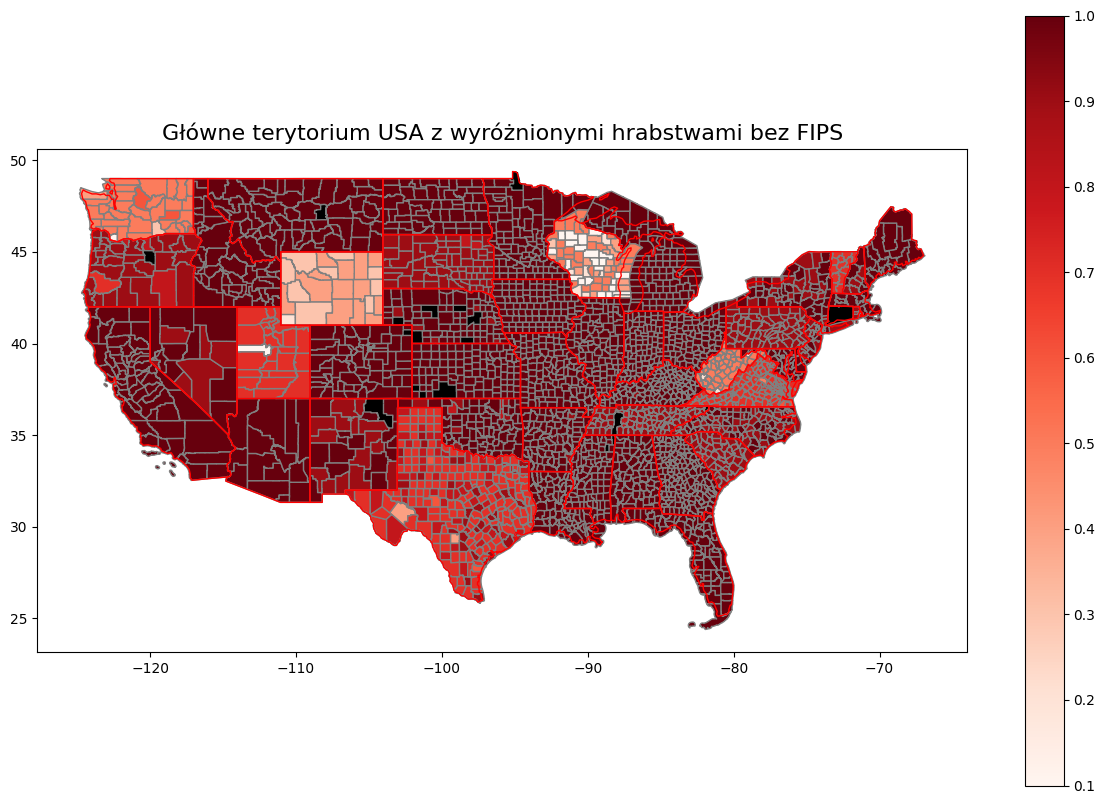

In [116]:
countyCount(2014,2023)

In [ ]:
def missingCountyMap(year):
    
    shapefile_path = "data/US_county/tl_2024_us_county.shp"
    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)
    

    data_folder = '../data/eaglei_data/'

    file_name = f'eaglei_outages_{year}.csv'
    file_path = os.path.join(data_folder, file_name)
    print(file_name)
    if not os.path.exists(file_path):
        print(f"Plik {file_name} nie istnieje!")
        return

    df_power = pd.read_csv(file_path)

    df_power['fips_code'] = df_power['fips_code'].astype(str).str.zfill(5)
    fips_codes = df_power.iloc[:,0].to_numpy().reshape(-1,1)
    fips_codes = pd.DataFrame(np.unique(fips_codes))
    fips_codes= fips_codes.astype(str)
    fips_codes = fips_codes.rename(columns={0 : "FIPS"})
    merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
    merged['Data'] = merged['FIPS'].apply(lambda x: 0 if pd.isna(x) else 1)

    us_bounds = box(-125, 24, -66, 50)
    mainland_us = merged[merged.geometry.intersects(us_bounds)]

    nan_counties = mainland_us[mainland_us['FIPS'].isna()]
    non_nan_counties = mainland_us[mainland_us['FIPS'].notna()]

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    nan_counties.plot(ax=ax, color="black", edgecolor="black", label="Brak FIPS")

    non_nan_counties.plot(column='Data', ax=ax, cmap="Reds", 
                        edgecolor="grey", missing_kwds={"color": "lightgrey"})

    ax.set_title("Główne terytorium USA z wyróżnionymi hrabstwami bez FIPS", fontsize=16)
    # ax.legend(["Brak FIPS"], fontsize=12)

    plt.show()


eaglei_outages_2014.csv


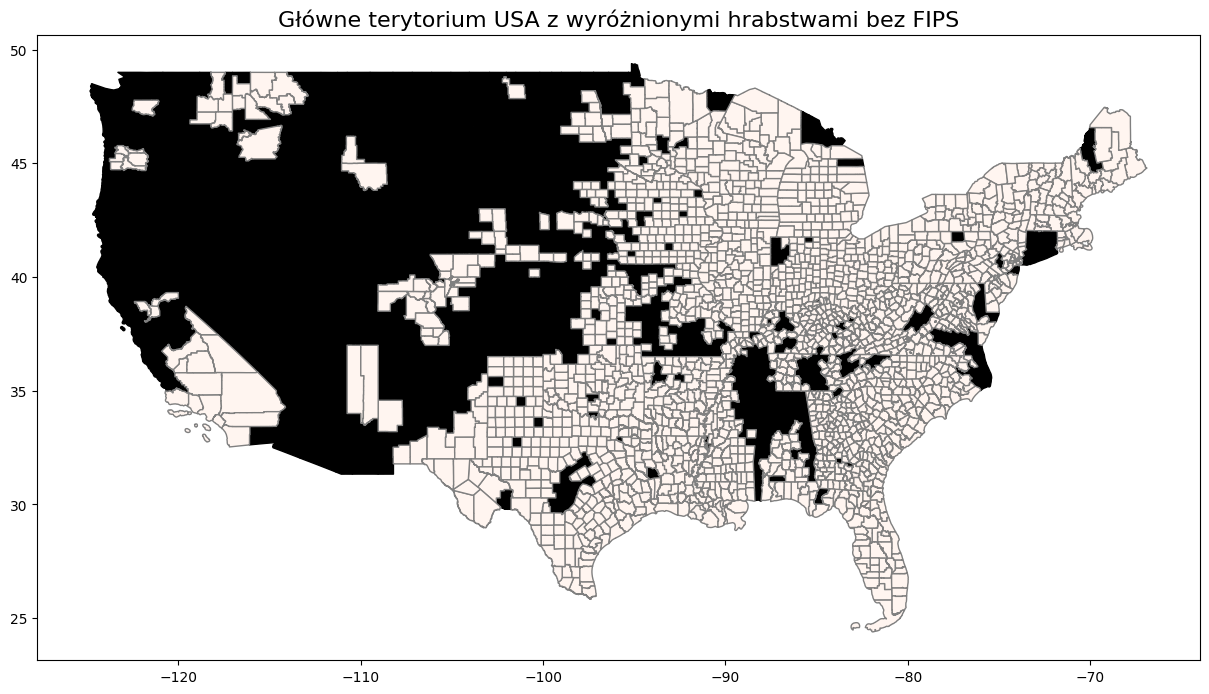

In [122]:
missingCountyMap(2014)